<a href="https://colab.research.google.com/github/Gouri1419/Assignments/blob/main/Day_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Day_13_Pharma_data.csv')
display(df.head())

,Product_ID,Product_Name,Region,Marketing_Spend,Sales,Effectiveness,Side_Effects,Age_Group,Trial_Period
0,101,PainRelief,North America,50000,100000,85,5,20-30,6 months
1,102,ColdCure,Europe,30000,60000,75,2,30-40,3 months
2,103,HeadacheFix,Asia,45000,80000,80,3,40-50,6 months
3,104,PainRelief,North America,52000,110000,88,4,50-60,12 months
4,105,ColdCure,Europe,28000,55000,70,1,30-40,3 months


In [2]:
print(df.isnull().sum())
for col in ['Marketing_Spend', 'Sales', 'Effectiveness', 'Side_Effects']:
    df[col] = df[col].fillna(df[col].mean())
df.drop_duplicates(inplace=True)
for col in ['Sales', 'Marketing_Spend', 'Effectiveness']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Product_ID         0
Product_Name       0
Region             0
Marketing_Spend    0
Sales              0
Effectiveness      0
Side_Effects       0
Age_Group          0
Trial_Period       0
dtype: int64


                        Sales                                                  \
                        count           mean          std       min       25%   
Region        Age_Group                                                         
Asia          40-50       2.0   85000.000000  7071.067812   80000.0   82500.0   
              50-60       1.0   85000.000000          NaN   85000.0   85000.0   
Europe        30-40       3.0   60000.000000  5000.000000   55000.0   57500.0   
North America 20-30       3.0  106666.666667  7637.626158  100000.0  102500.0   
              50-60       1.0  110000.000000          NaN  110000.0  110000.0   

                                                      Marketing_Spend  \
                              50%       75%       max           count   
Region        Age_Group                                                 
Asia          40-50       85000.0   87500.0   90000.0             2.0   
              50-60       85000.0   85000.0   85000.0      

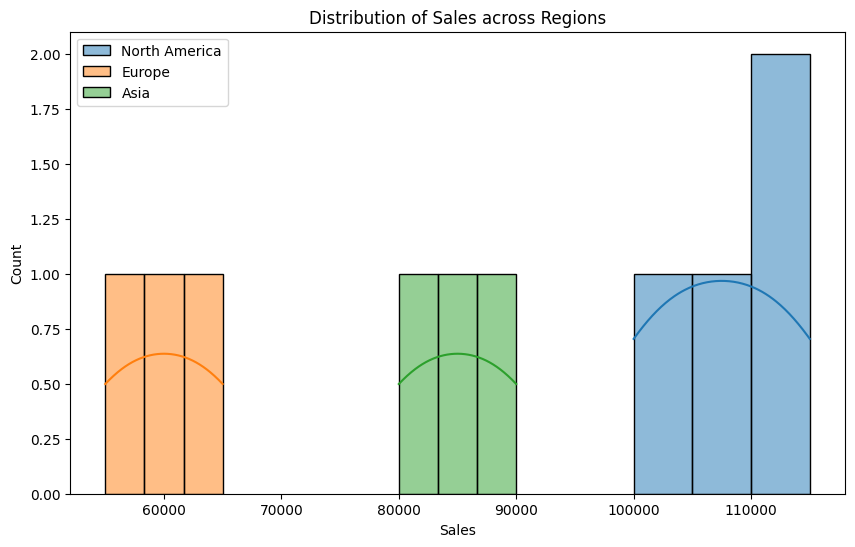

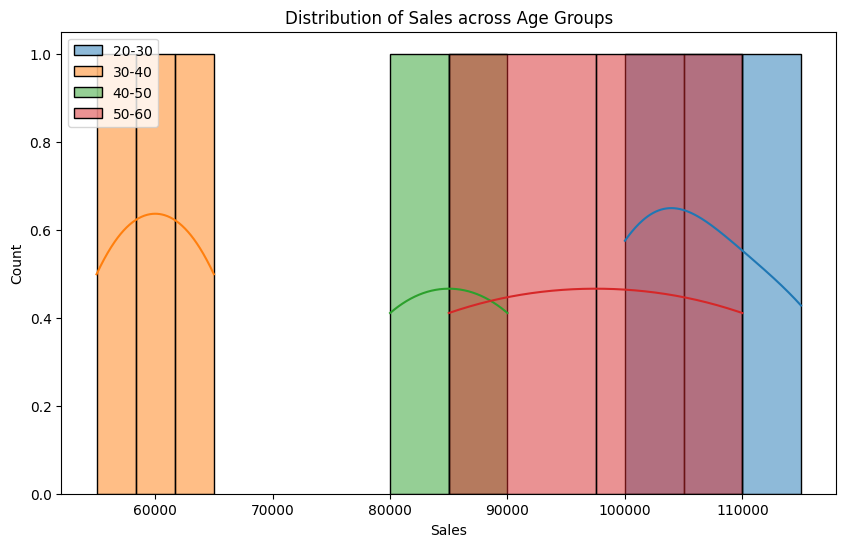

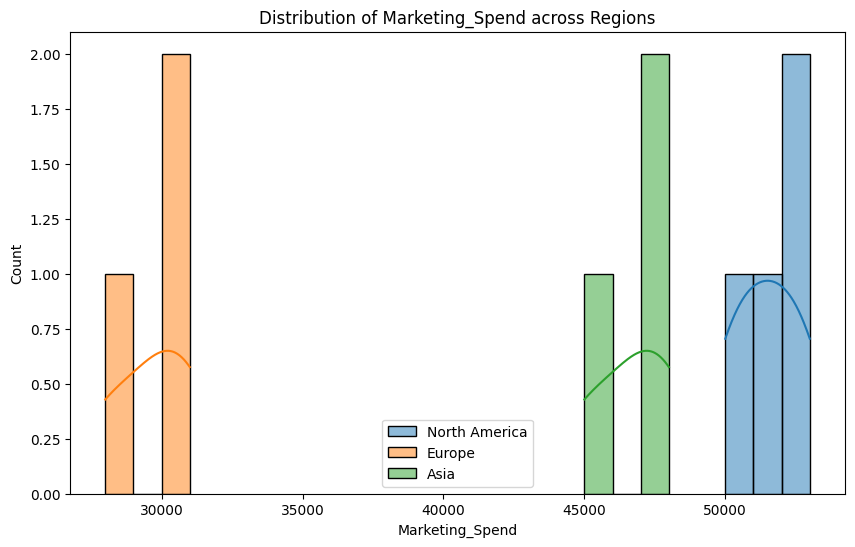

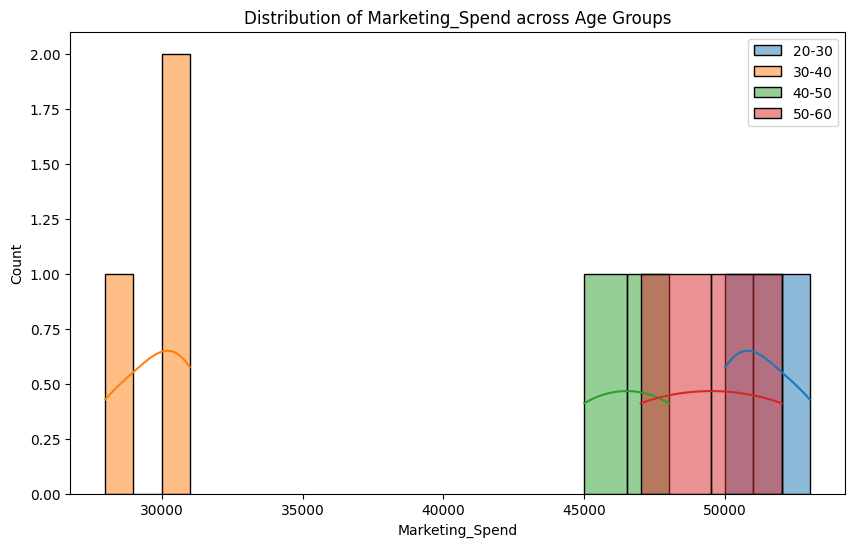

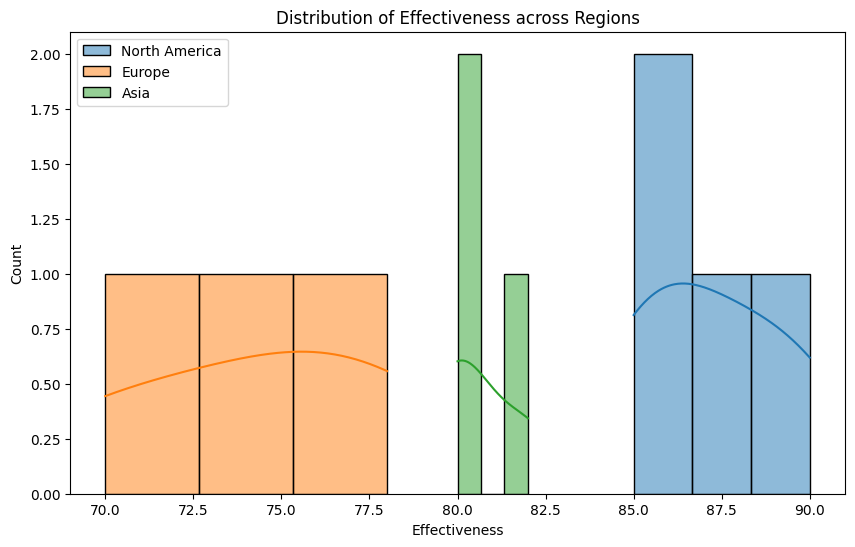

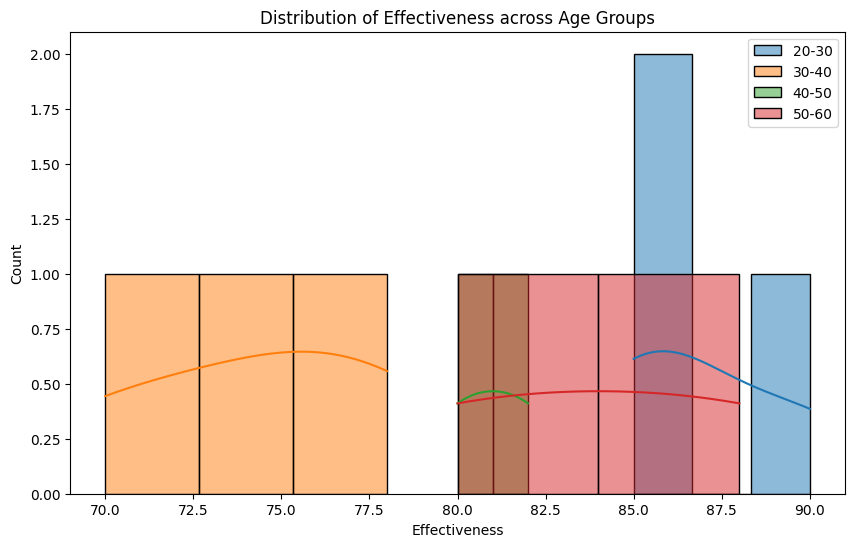

                    Sales  Marketing_Spend  Effectiveness
Sales            1.000000         0.956916       0.975171
Marketing_Spend  0.956916         1.000000       0.913611
Effectiveness    0.975171         0.913611       1.000000


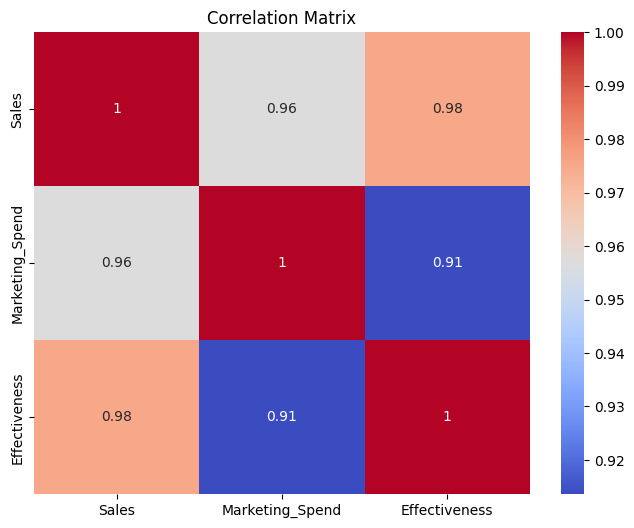

Region
North America    4
Europe           3
Asia             3
Name: count, dtype: int64


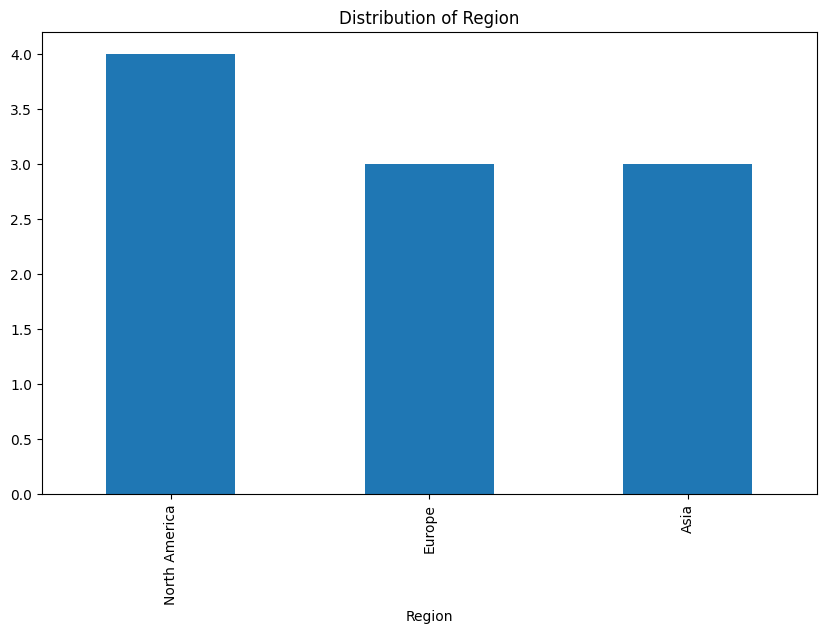

Age_Group
20-30    3
30-40    3
40-50    2
50-60    2
Name: count, dtype: int64


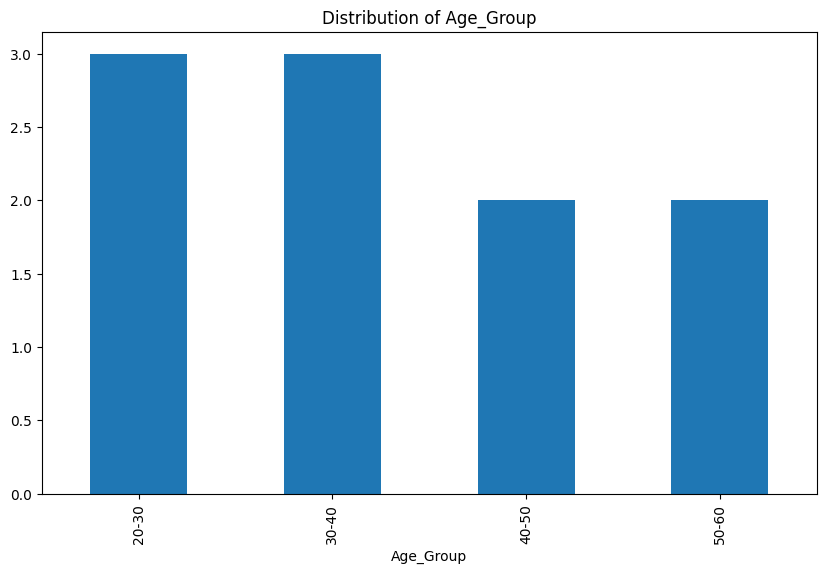

Product_Name
PainRelief     4
ColdCure       3
HeadacheFix    3
Name: count, dtype: int64


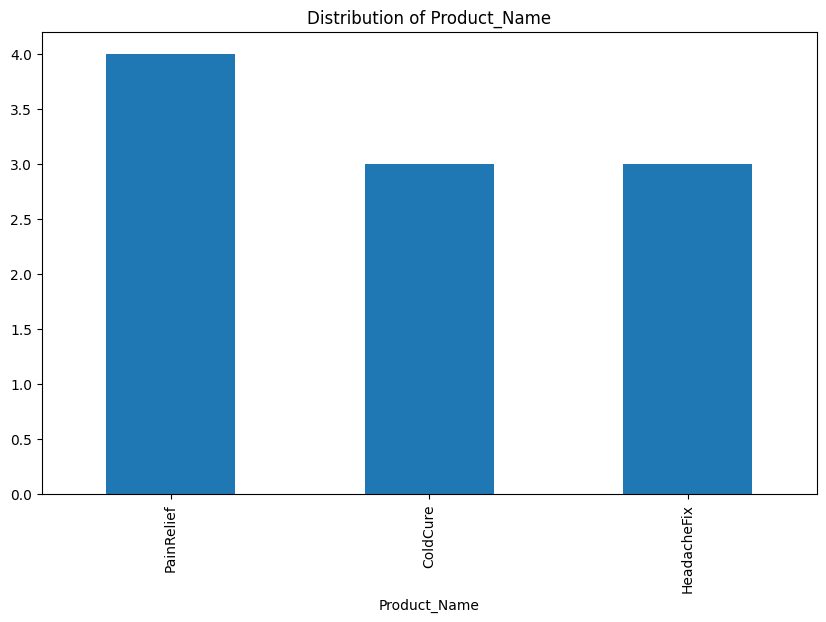

Trial_Period
6 months     5
3 months     3
12 months    2
Name: count, dtype: int64


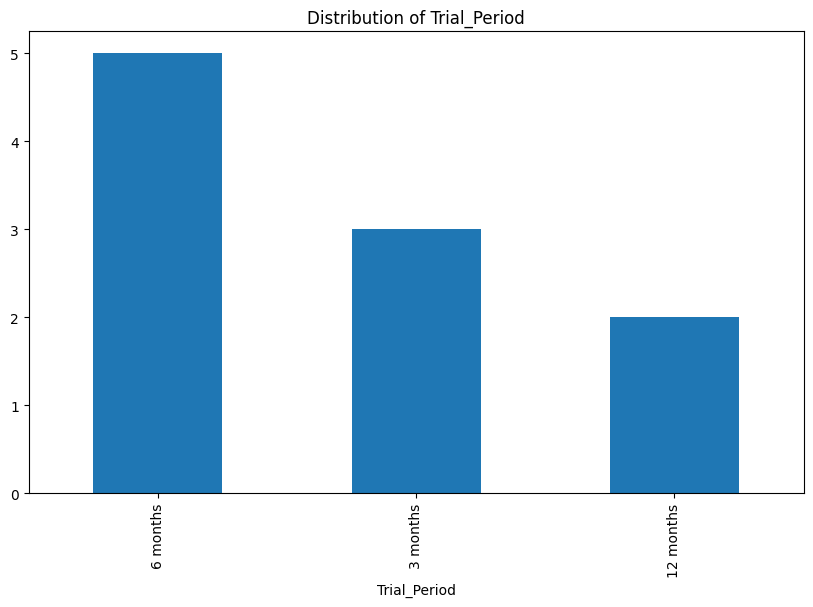

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.groupby(['Region', 'Age_Group'])[['Sales', 'Marketing_Spend', 'Effectiveness']].describe())
for col in ['Sales', 'Marketing_Spend', 'Effectiveness']:
    plt.figure(figsize=(10, 6))
    for region in df['Region'].unique():
        sns.histplot(data=df[df['Region'] == region], x=col, kde=True, label=region)
    plt.title(f'Distribution of {col} across Regions')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    for age_group in df['Age_Group'].unique():
        sns.histplot(data=df[df['Age_Group'] == age_group], x=col, kde=True, label=age_group)
    plt.title(f'Distribution of {col} across Age Groups')
    plt.legend()
    plt.show()
correlation_matrix = df[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

for col in ['Region', 'Age_Group', 'Product_Name', 'Trial_Period']:
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

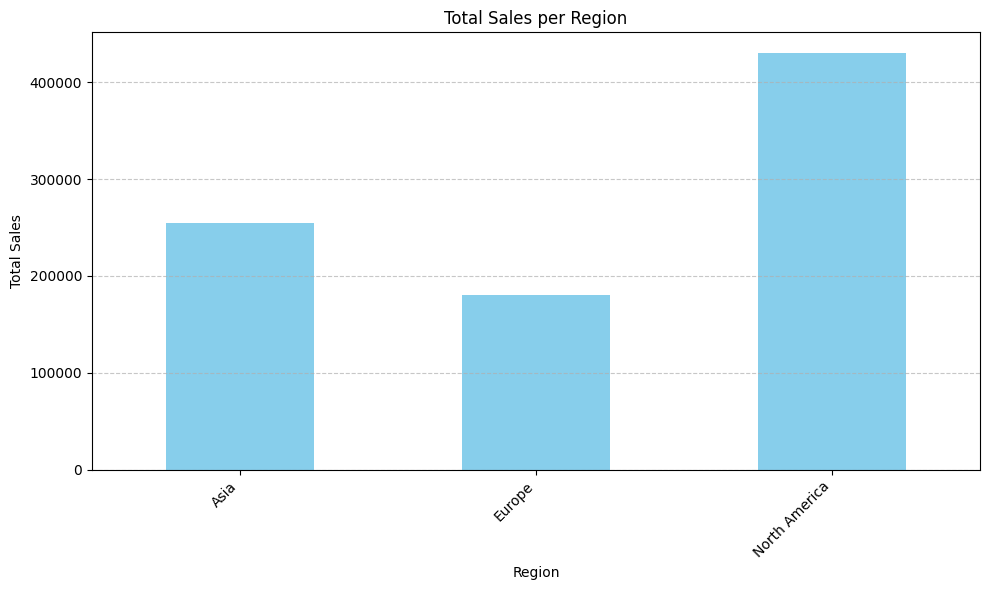

In [4]:
import matplotlib.pyplot as plt


region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

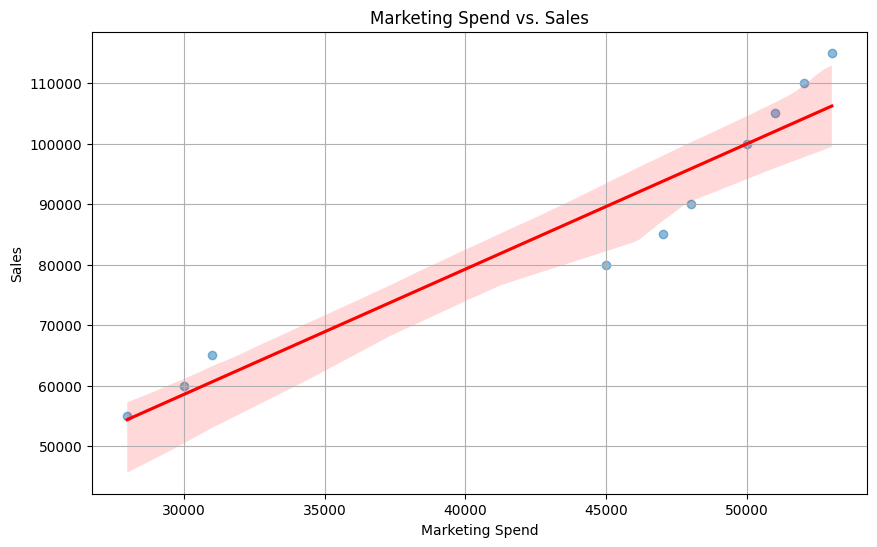

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='Marketing_Spend', y='Sales', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.title('Marketing Spend vs. Sales')
plt.grid(True)
plt.show()

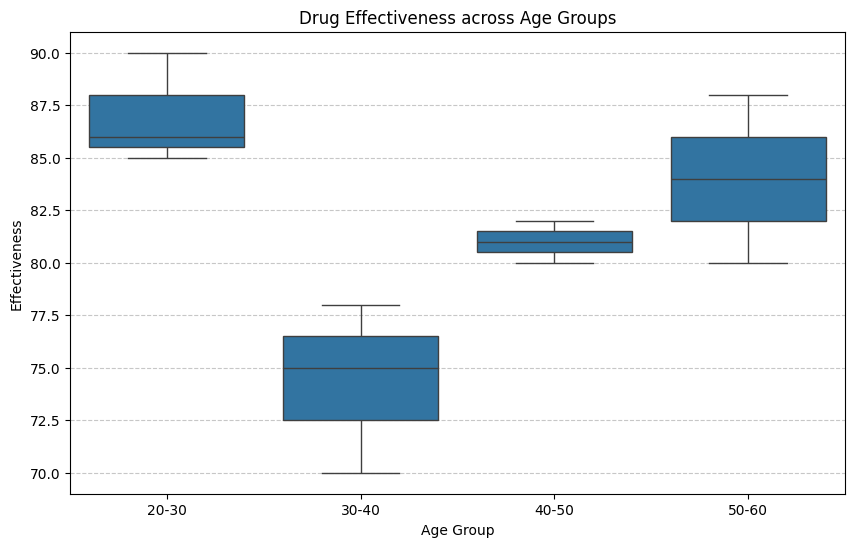

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Effectiveness', data=df)
plt.title('Drug Effectiveness across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Effectiveness')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

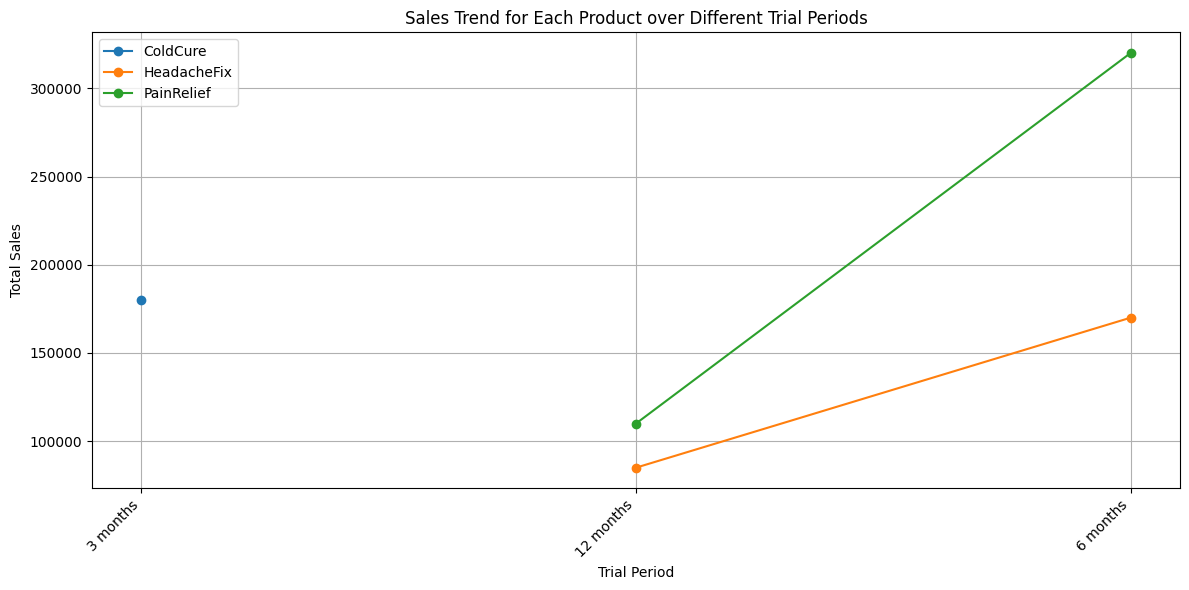

In [7]:
import matplotlib.pyplot as plt

# Group data by product and trial period, then sum sales
product_sales = df.groupby(['Product_Name', 'Trial_Period'])['Sales'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
for product in product_sales['Product_Name'].unique():
    product_data = product_sales[product_sales['Product_Name'] == product]
    plt.plot(product_data['Trial_Period'], product_data['Sales'], marker='o', label=product)

plt.xlabel('Trial Period')
plt.ylabel('Total Sales')
plt.title('Sales Trend for Each Product over Different Trial Periods')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

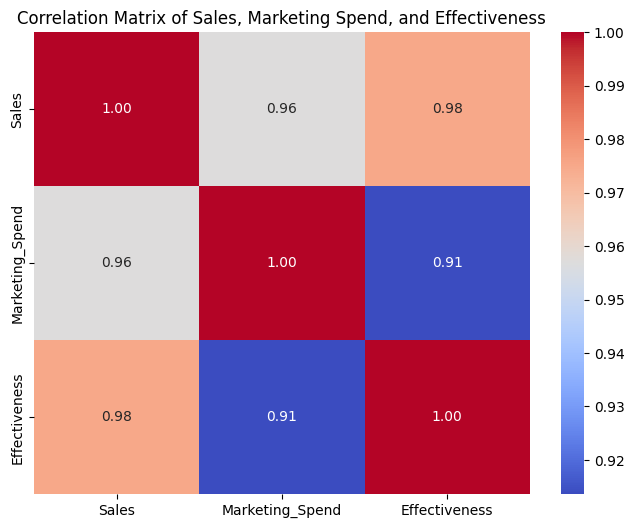

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sales, Marketing Spend, and Effectiveness')
plt.show()

In [9]:

region_sales = df.groupby('Region')['Sales'].sum()
highest_sales_region = region_sales.idxmax()
lowest_sales_region = region_sales.idxmin()
sales_difference = region_sales.max() - region_sales.min()
print(f"Region with highest sales: {highest_sales_region}")
print(f"Region with lowest sales: {lowest_sales_region}")
print(f"Difference in sales: {sales_difference}")


correlation_marketing_sales = df['Marketing_Spend'].corr(df['Sales'])
print(f"\nCorrelation between Marketing Spend and Sales: {correlation_marketing_sales}")
if abs(correlation_marketing_sales) > 0.7:
    strength = 'strong'
elif abs(correlation_marketing_sales) > 0.5:
    strength = 'moderate'
elif abs(correlation_marketing_sales) > 0.3:
    strength = 'weak'
else:
    strength = 'very weak or no correlation'
print(f"Strength of the relationship: {strength}")


effectiveness_by_age = df.groupby('Age_Group')['Effectiveness'].describe()
print("\nEffectiveness by Age Group:")
display(effectiveness_by_age)


print("\nSales Trend Analysis (requires manual observation from the line plot)")

correlation_matrix = df[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()
print("\nCorrelation Matrix:")
display(correlation_matrix)

strongest_positive_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
strongest_positive_correlation = strongest_positive_correlation[strongest_positive_correlation < 1].head(1)

strongest_negative_correlation = correlation_matrix.unstack().sort_values().drop_duplicates().head(1)

print("\nStrongest Positive Correlation:", strongest_positive_correlation)
print("\nStrongest Negative Correlation:", strongest_negative_correlation)

Region with highest sales: North America
Region with lowest sales: Europe
Difference in sales: 250000

Correlation between Marketing Spend and Sales: 0.9569159939653251
Strength of the relationship: strong

Effectiveness by Age Group:


,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
20-30,3.0,87.000000,2.645751,85.0,85.5,86.0,88.0,90.0
30-40,3.0,74.333333,4.041452,70.0,72.5,75.0,76.5,78.0
40-50,2.0,81.000000,1.414214,80.0,80.5,81.0,81.5,82.0
50-60,2.0,84.000000,5.656854,80.0,82.0,84.0,86.0,88.0



Sales Trend Analysis (requires manual observation from the line plot)

Correlation Matrix:


,Sales,Marketing_Spend,Effectiveness
Sales,1.000000,0.956916,0.975171
Marketing_Spend,0.956916,1.000000,0.913611
Effectiveness,0.975171,0.913611,1.000000



Strongest Positive Correlation: Sales  Effectiveness    0.975171
dtype: float64

Strongest Negative Correlation: Marketing_Spend  Effectiveness    0.913611
dtype: float64
